In [1]:
# Jupyter magic
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # standard Python plotting library

# import the tdt library
import tdt
import pandas as pd

In [2]:
# Must read with "/" not "\
NAc_PATH = 'C:/Users/yongc/Desktop/Exp 2 - 03032024 Social Defeat 2/dLight_NAc-240303-085020'
NAc_data = tdt.read_block(NAc_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Exp 2 - 03032024 Social Defeat 2/dLight_NAc-240303-085020\Notes.txt
read from t=0s to t=503.58s


## Basic Plotting

In [3]:
#Jupyter has a bug that requires import of matplotlib outside of cell with matplotlib inline magic to properly apply rcParams

import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'

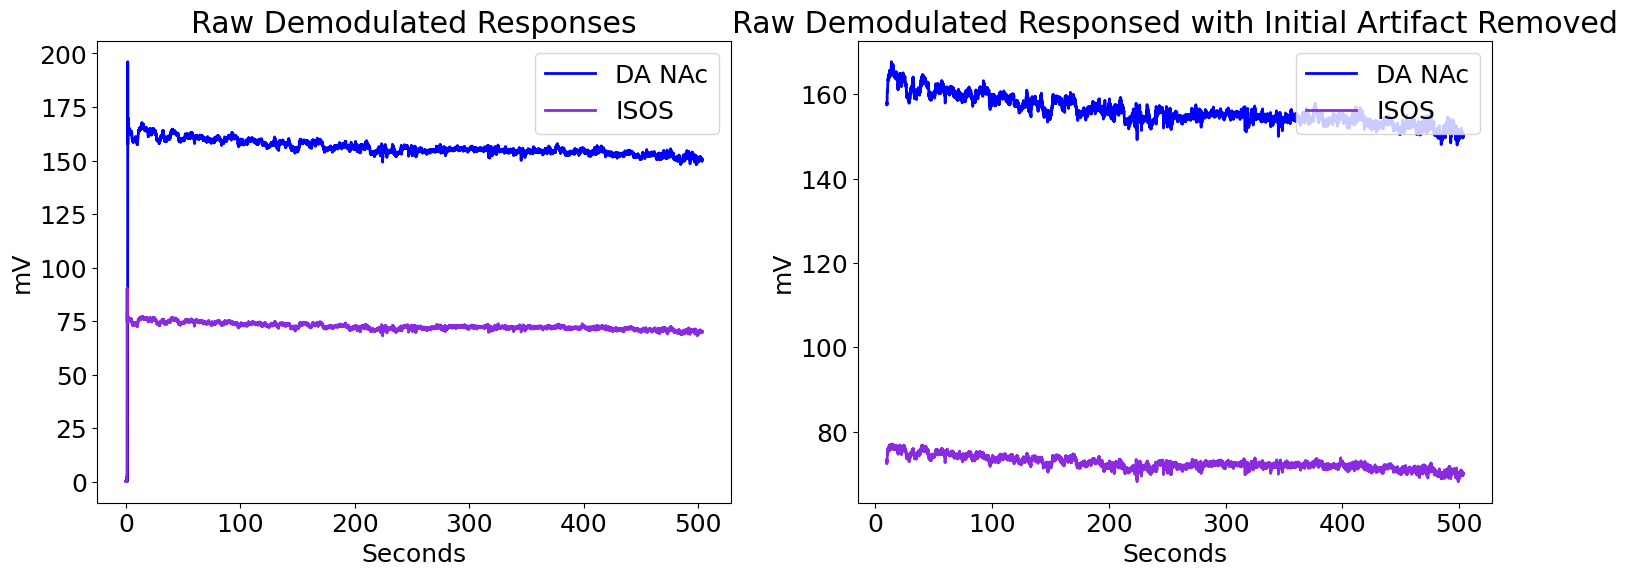

In [4]:
# Make a time array based on the number of samples and sample freq of the demodulated streams
NAc_time = np.linspace(1,len(NAc_data.streams[DA].data), len(NAc_data.streams[DA].data))/NAc_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(NAc_time, NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax0.plot(NAc_time, NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds')
ax0.set_title('Raw Demodulated Responses')
ax0.legend(handles=[p1,p2], loc='upper right')

# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 10
inds = np.where(NAc_time>t)
ind = inds[0][0]
NAc_time = NAc_time[ind:] # go from ind to final index
NAc_data.streams[DA].data = NAc_data.streams[DA].data[ind:]
NAc_data.streams[ISOS].data = NAc_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(NAc_time,NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax1.plot(NAc_time,NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds')
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed')
ax1.legend(handles=[p1,p2],loc='upper right')

## Converting Boris Data to Epocs

In [5]:
csv_path = r"C:\Users\yongc\Desktop\Exp 2 - 03032024 Social Defeat 2\Adjusted Videos\dLight_NAc-240303-085020.csv"
bout_df = pd.read_csv(csv_path)

In [6]:
bout_df.head()

,Observation id,Observation date,Description,Observation duration,Observation type,Source,Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,dLight_NAc-240303-085020,2024-03-04 09:34:33,NaN,122.063,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,491.763,17.36,subject,chased,NaN,START,217.684,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3780,NaN,NaN
1,dLight_NAc-240303-085020,2024-03-04 09:34:33,NaN,122.063,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,491.763,17.36,subject,chased,NaN,STOP,219.182,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3806,NaN,NaN
2,dLight_NAc-240303-085020,2024-03-04 09:34:33,NaN,122.063,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,491.763,17.36,subject,chased,NaN,START,220.853,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3835,NaN,NaN
3,dLight_NAc-240303-085020,2024-03-04 09:34:33,NaN,122.063,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,491.763,17.36,subject,chased,NaN,STOP,222.984,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3872,NaN,NaN
4,dLight_NAc-240303-085020,2024-03-04 09:34:33,NaN,122.063,Media file(s),player #1:C:/Users/yongc/Desktop/Exp 2 - 03032...,491.763,17.36,subject,fought,NaN,START,226.613,C:/Users/yongc/Desktop/Exp 2 - 03032024 Social...,3935,NaN,NaN


f = Fought, 
c = chased
fc = fought/chased

In [7]:
FC_onset = []
FC_offset = []

In [8]:
FC_onset_values = bout_df[((bout_df['Behavior'] == 'fought') | (bout_df['Behavior'] == 'chased')) & (bout_df['Behavior type'] == 'START')]['Time'].values
FC_onset = FC_onset_values.tolist()

FC_offset_values = bout_df[((bout_df['Behavior'] == 'fought') | (bout_df['Behavior'] == 'chased')) & (bout_df['Behavior type'] == 'STOP')]['Time'].values
FC_offset = FC_offset_values.tolist()

print(FC_onset)
print(FC_offset)

[217.684, 220.853, 226.613, 234.159, 240.438, 242.915, 250.115, 264.228, 268.203, 270.276, 272.177, 274.597, 307.892, 313.998, 329.263, 335.081]
[219.182, 222.984, 229.551, 234.965, 240.841, 248.56, 250.403, 265.783, 269.009, 270.449, 274.136, 276.21, 311.578, 318.26, 332.892, 339.747]


In [9]:
FC_EVENT = 'FC_EVENT'
data_arr = []
for i in range(len(FC_onset)):
    data_arr.append(1)

FC_DICT = {
        "name":FC_EVENT,
        "onset":FC_onset,
        "offset":FC_offset,
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":data_arr
        }

NAc_data.epocs.FC_EVENT = tdt.StructType(FC_DICT)
FC_EVENT_on = NAc_data.epocs[FC_EVENT].onset
FC_EVENT_off = NAc_data.epocs[FC_EVENT].offset


In [10]:
len(FC_EVENT_on)

16

## Downsample Data Doing Local Averaging

In [11]:
# Average around every Nth point and downsample Nx
N = 10 # Average every 10 samples into 1 value
F405 = []
F465 = []
for i in range(0, len(NAc_data.streams[DA].data), N):
    F465.append(np.mean(NAc_data.streams[DA].data[i:i+N-1])) # This is the moving window mean
NAc_data.streams[DA].data = F465

for i in range(0, len(NAc_data.streams[ISOS].data), N):
    F405.append(np.mean(NAc_data.streams[ISOS].data[i:i+N-1]))
NAc_data.streams[ISOS].data = F405

#decimate time array to match length of demodulated stream
NAc_time = NAc_time[::N] # go from beginning to end of array in steps on N
NAc_time = NAc_time[:len(NAc_data.streams[DA].data)]

# Detrending and dFF
# Full trace dFF according to Lerner et al. 2015
# https://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline

x = np.array(NAc_data.streams[ISOS].data)
y = np.array(NAc_data.streams[DA].data)
bls = np.polyfit(x, y, 1)
Y_fit_all = np.multiply(bls[0], x) + bls[1]
Y_dFC_all = y - Y_fit_all

dFF = np.multiply(100, np.divide(Y_dFC_all, Y_fit_all))
std_dFF = np.std(dFF)

In [12]:
# Add the first and last time stamps to make tails on the TTL stream
FC_EVENT_x = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([FC_EVENT_on, FC_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(FC_EVENT_on)
d = NAc_data.epocs[FC_EVENT].data
# Add zeros to beginning and end of 0,1 value array to match len of FC_x
FC_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

In [13]:
print(FC_EVENT_x)
print(FC_EVENT_y)

[ 10.00046572 217.684      217.684      219.182      219.182
 220.853      220.853      222.984      222.984      226.613
 226.613      229.551      229.551      234.159      234.159
 234.965      234.965      240.438      240.438      240.841
 240.841      242.915      242.915      248.56       248.56
 250.115      250.115      250.403      250.403      264.228
 264.228      265.783      265.783      268.203      268.203
 269.009      269.009      270.276      270.276      270.449
 270.449      272.177      272.177      274.136      274.136
 274.597      274.597      276.21       276.21       307.892
 307.892      311.578      311.578      313.998      313.998
 318.26       318.26       329.263      329.263      332.892
 332.892      335.081      335.081      339.747      339.747
 503.43738385]
[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1

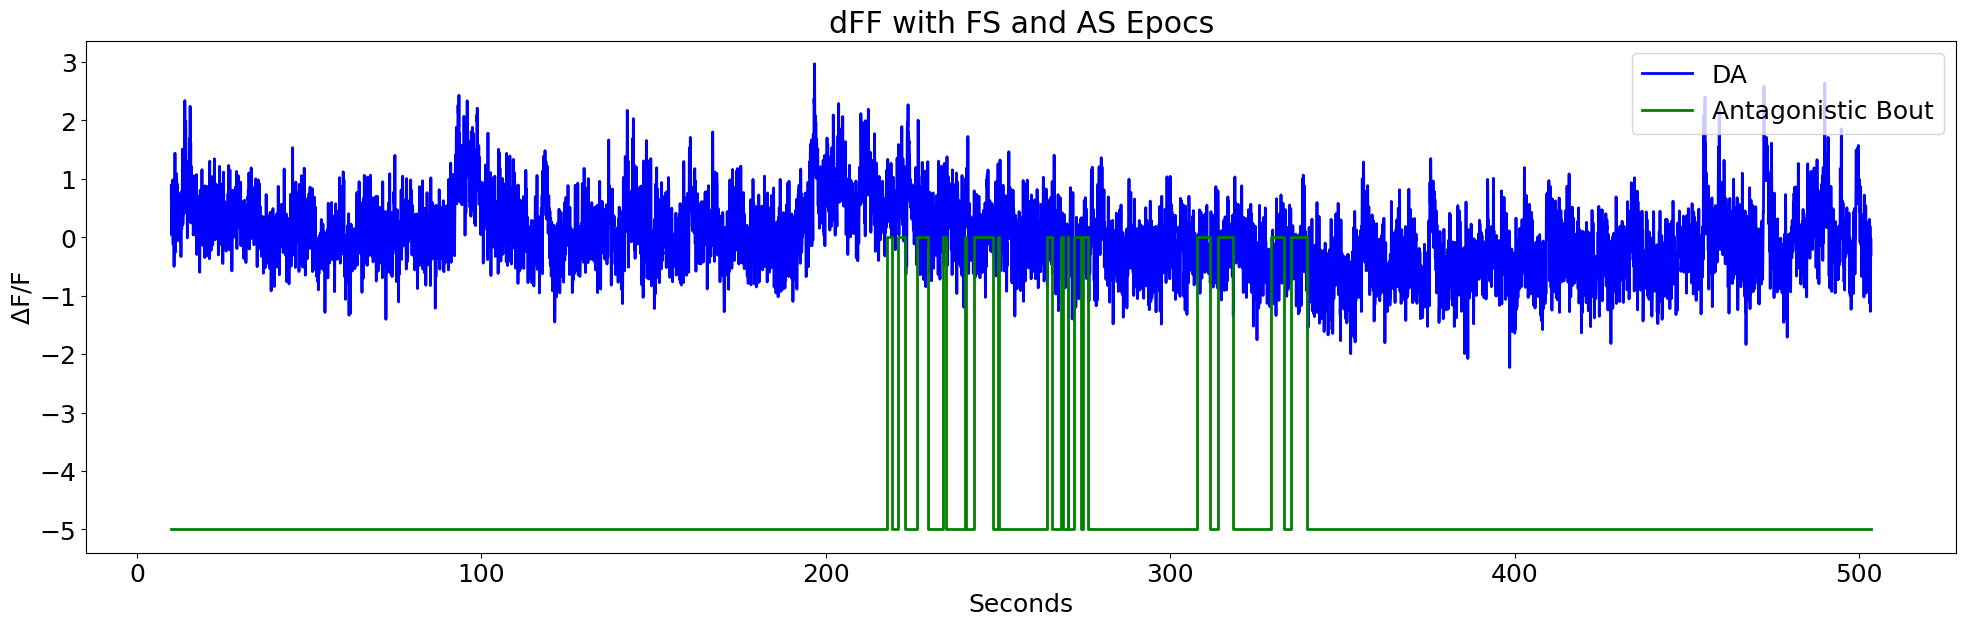

In [14]:
y_scale = 5 #adjust according to data needs
y_shift = -5 #scale and shift are just for aesthetics

# First subplot in a series: dFF with FC epocs
fig2 = plt.figure(figsize=(20,12))
ax2 = fig2.add_subplot(211)

p1, = ax2.plot(NAc_time, dFF, linewidth=2, color='blue', label='DA')
p2, = ax2.plot(FC_EVENT_x, y_scale*FC_EVENT_y+y_shift, linewidth=2, color='green', label='Antagonistic Bout')


ax2.set_ylabel(r'$\Delta$F/F')
ax2.set_xlabel('Seconds')
ax2.set_title('dFF with FS and AS Epocs')
ax2.legend(handles=[p1,p2], loc='upper right')
fig2.tight_layout()

## Combining Close bouts

In [15]:
FC = "FC"
FC_DICT2 = {
        "name":FC,
        "onset":[],
        "offset":[],
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":[]
        }

NAc_data.epocs.FC = tdt.StructType(FC_DICT2)

FC_on_diff = np.diff(NAc_data.epocs[FC_EVENT].onset)
BOUT_TIME_THRESHOLD = 7.5
FC_diff_ind = np.where(FC_on_diff >= BOUT_TIME_THRESHOLD)[0]
#for some reason np.where returns a 2D array, hence the [0]

# Make an onset/ offset array based on threshold indicies
diff_ind = 0
for ind in FC_diff_ind: 
    # BOUT onset is thresholded onset index of FC epoc event
    NAc_data.epocs[FC].onset.append(NAc_data.epocs[FC_EVENT].onset[diff_ind])
    # BOUT offset is thresholded offset of FC event before next onset
    NAc_data.epocs[FC].offset.append(NAc_data.epocs[FC_EVENT].offset[ind])
    # set the values for data, arbitrary 1
    NAc_data.epocs[FC].data.append(1)
    diff_ind = ind + 1

# special case for last event to handle FC event offset indexing
NAc_data.epocs[FC].onset.append(NAc_data.epocs[FC_EVENT].onset[FC_diff_ind[-1]+1])
NAc_data.epocs[FC].offset.append(NAc_data.epocs[FC_EVENT].offset[-1])
NAc_data.epocs[FC].data.append(1)

# Now determine if it was a 'real' FC bout by thresholding by some
# user-set number of FCs in a row
MIN_FC_THRESH = 1 #1 FCs or more make a bout
FCs_array = []

NAc_data.epocs[FC].onset = np.array(NAc_data.epocs[FC].onset)
NAc_data.epocs[FC].offset = np.array(NAc_data.epocs[FC].offset)

# Find number of FCs in FCs_array between onset and offset of our new FC BOUT FC_EVENT
for on, off in zip(NAc_data.epocs[FC].onset,NAc_data.epocs[FC].offset):
    FCs_array.append(
        len(np.where((NAc_data.epocs[FC_EVENT].onset >= on) & (NAc_data.epocs[FC_EVENT].onset <= off))[0]))

NAc_data.epocs[FC].onset = (NAc_data.epocs[FC].onset).tolist()
NAc_data.epocs[FC].offset = (NAc_data.epocs[FC].offset).tolist()

# Remove onsets, offsets, and data of thrown out events
FCs_array = np.array(FCs_array)
inds = np.where(FCs_array<MIN_FC_THRESH)[0]
for index in sorted(inds, reverse=True):
    del NAc_data.epocs[FC].onset[index]
    del NAc_data.epocs[FC].offset[index]
    del NAc_data.epocs[FC].data[index]



In [16]:
# Make a continuous time series for FC BOUTS for plotting
FC_EVENT_on = NAc_data.epocs[FC].onset
FC_EVENT_off = NAc_data.epocs[FC].offset

FC_EVENT_on

[217.684, 234.159, 264.228, 307.892, 329.263]

In [17]:
FC_EVENT_x2 = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([FC_EVENT_on, FC_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(FC_EVENT_on)
d = NAc_data.epocs[FC].data

FC_EVENT_y2 = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)
print(len(FC_EVENT_y2))
print(len(FC_EVENT_x2))

22
22


In [18]:
print(len(FC_EVENT_y))
print(len(FC_EVENT_x))

print(len(FC_EVENT_y2))
print(len(FC_EVENT_x2))

66
66
22
22


In [19]:
print(FC_EVENT_x)
print(FC_EVENT_x2)

[ 10.00046572 217.684      217.684      219.182      219.182
 220.853      220.853      222.984      222.984      226.613
 226.613      229.551      229.551      234.159      234.159
 234.965      234.965      240.438      240.438      240.841
 240.841      242.915      242.915      248.56       248.56
 250.115      250.115      250.403      250.403      264.228
 264.228      265.783      265.783      268.203      268.203
 269.009      269.009      270.276      270.276      270.449
 270.449      272.177      272.177      274.136      274.136
 274.597      274.597      276.21       276.21       307.892
 307.892      311.578      311.578      313.998      313.998
 318.26       318.26       329.263      329.263      332.892
 332.892      335.081      335.081      339.747      339.747
 503.43738385]
[ 10.00046572 217.684      217.684      229.551      229.551
 234.159      234.159      250.403      250.403      264.228
 264.228      276.21       276.21       307.892      307.892
 318.26   

Replot

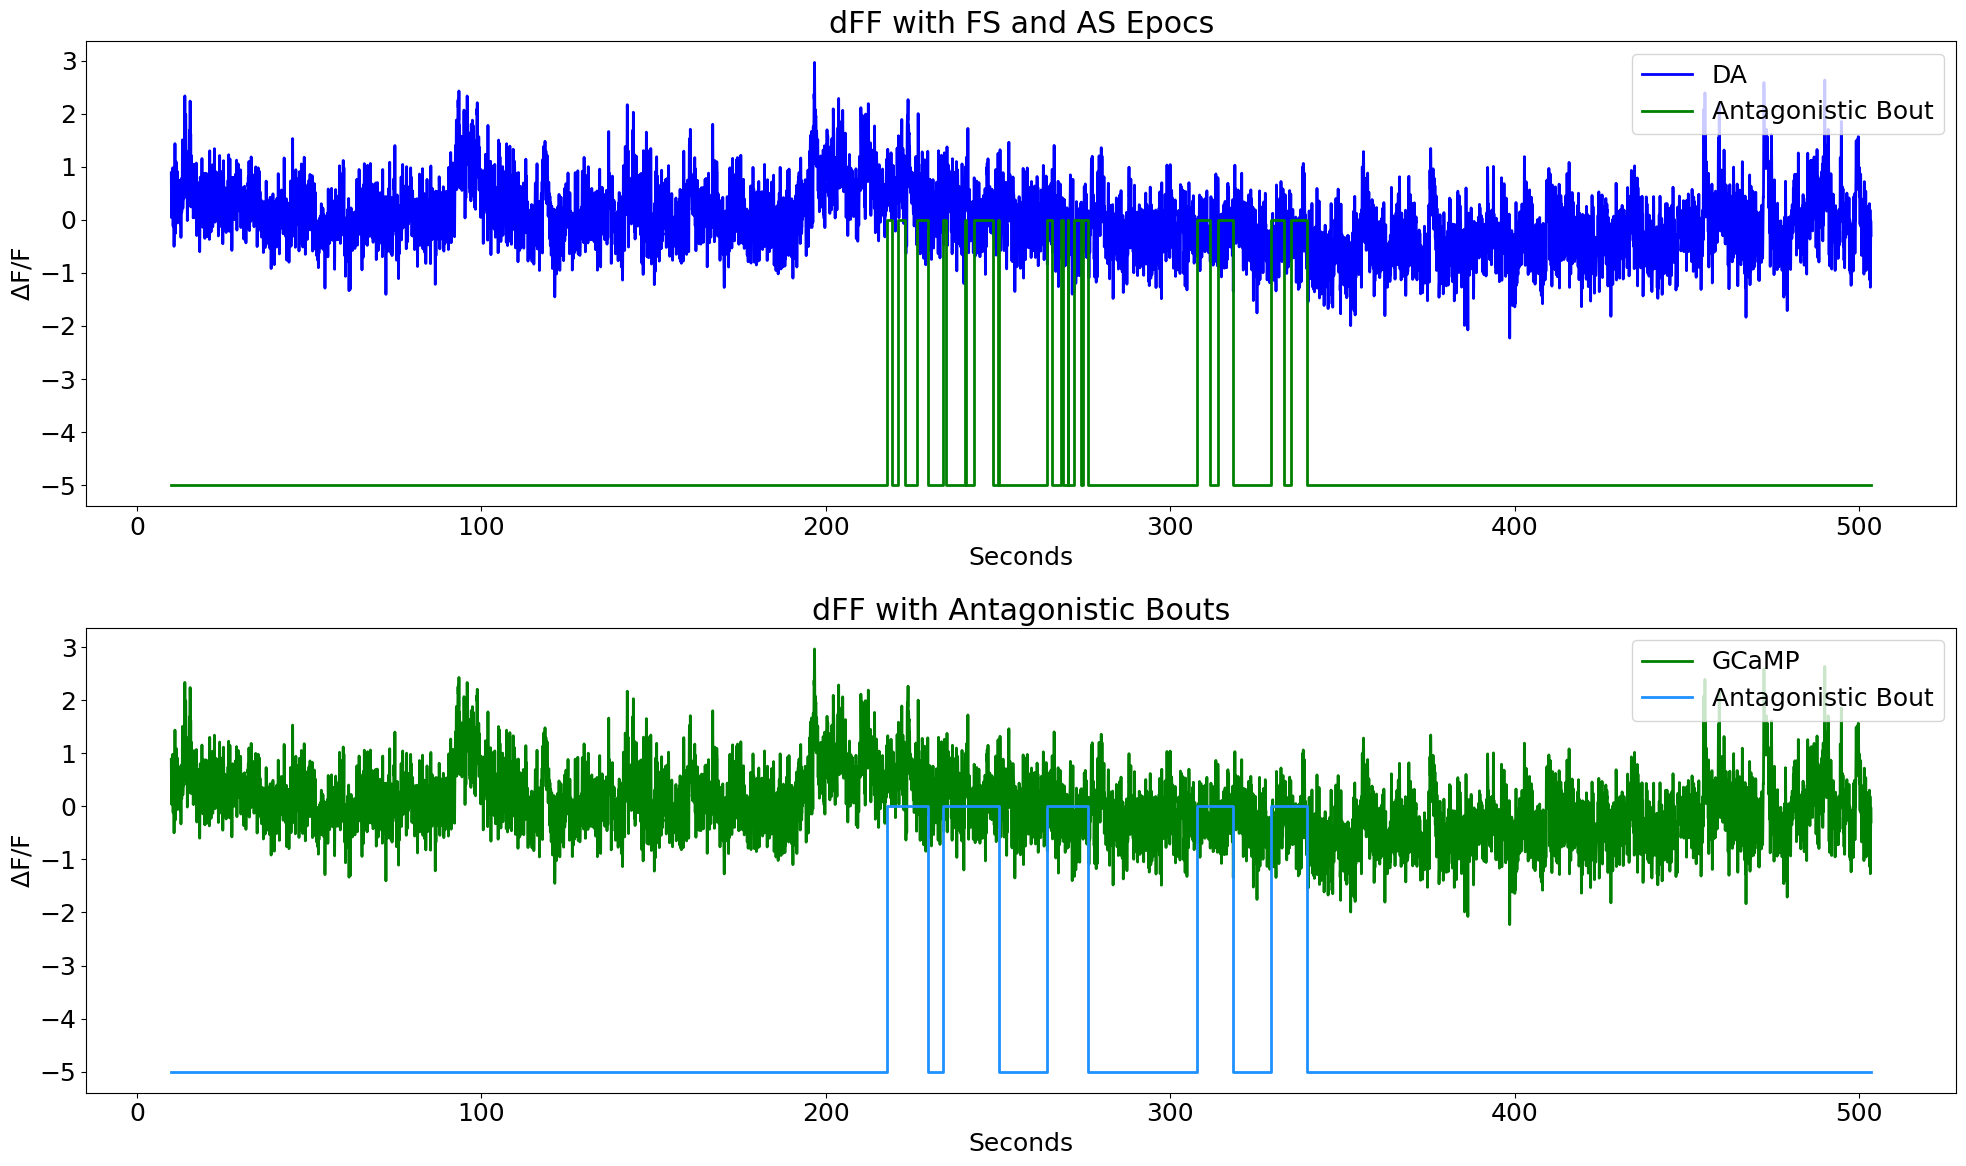

In [20]:
ax3 = fig2.add_subplot(212)
p1, = ax3.plot(NAc_time, dFF, linewidth=2, color='green', label='GCaMP')
p2, = ax3.plot(FC_EVENT_x2, y_scale*FC_EVENT_y2+y_shift, linewidth=2, color='dodgerblue', label='Antagonistic Bout')
ax3.set_ylabel(r'$\Delta$F/F')
ax3.set_xlabel('Seconds')
ax3.set_title('dFF with Antagonistic Bouts')
ax3.legend(handles=[p1, p2], loc='upper right')
fig2.tight_layout()
fig2

### Make nice area fills instead of epocs for aesthetics

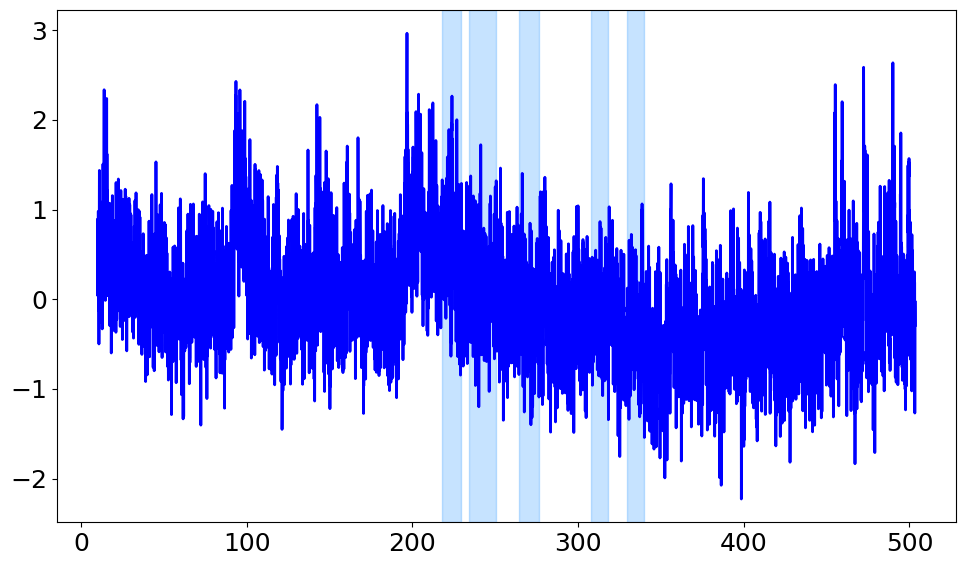

In [21]:
fig4 = plt.figure(figsize=(10,6))
ax5 = fig4.add_subplot(111)

p1, = ax5.plot(NAc_time, dFF,linewidth=2, color='blue', label='DA')
for on, off in zip(NAc_data.epocs[FC].onset, NAc_data.epocs[FC].offset):
    ax5.axvspan(on, off, alpha=0.25, color='dodgerblue')
    
#ax5.set_ylabel(r'$\Delta$F/F')
#ax5.set_xlabel('Seconds')
#ax5.set_title('NAc - dFF with Antagonistic Bouts')
fig4.savefig(r'C:\Users\yongc\Desktop\Photometry\Graph Pictures\NAc_agonistic_behavior_10downsample.svg', format='svg')
fig4.tight_layout()

## Make a Peri-Event Stimulus Plot

In [22]:
PRE_TIME = 5 # five seconds before event onset
POST_TIME = 5 # ten seconds after
fs = NAc_data.streams[DA].fs/N #recall we downsampled by N = 10 earlier

# time span for peri-event filtering, PRE and POST, in samples
TRANGE = [-PRE_TIME*np.floor(fs), POST_TIME*np.floor(fs)]

dFFC_snips = []
array_ind = []
pre_stim = []
post_stim = []

for on in NAc_data.epocs[FC].onset:
    # If the bout cannot include pre-time seconds before event, make zero
    if on < PRE_TIME:
        dFFC_snips.append(np.zeros(TRANGE[1]-TRANGE[0]))
    else: 
        # find first time index after bout onset
        array_ind.append(np.where(NAc_time > on)[0][0])
        # find index corresponding to pre and post stim durations
        pre_stim.append(array_ind[-1] + TRANGE[0])
        post_stim.append(array_ind[-1] + TRANGE[1])
        dFFC_snips.append(dFF[int(pre_stim[-1]):int(post_stim[-1])])

# Make all snippets the same size based on min snippet length
min1 = np.min([np.size(x) for x in dFFC_snips])
dFFC_snips = [x[1:min1] for x in dFFC_snips]

mean_dFFC_snips = np.mean(dFFC_snips, axis=0)
std_dFFC_snips = np.std(mean_dFFC_snips, axis=0)

peri_time = np.linspace(1, len(mean_dFFC_snips), len(mean_dFFC_snips))/fs - PRE_TIME

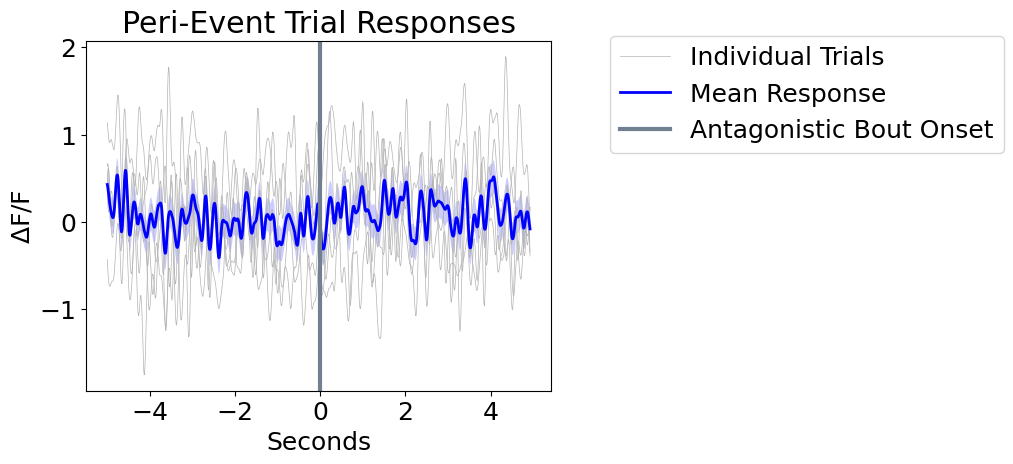

In [23]:
fig5 = plt.figure(figsize=(6,10))
ax6 = fig5.add_subplot(211)

for snip in dFFC_snips:
    p1, = ax6.plot(peri_time, snip, linewidth=.5, color=[.7, .7, .7], label='Individual Trials')
p2, = ax6.plot(peri_time, mean_dFFC_snips, linewidth=2, color='blue', label='Mean Response')

# Plotting standard error bands
p3 = ax6.fill_between(peri_time, mean_dFFC_snips+std_dFFC_snips, 
                      mean_dFFC_snips-std_dFFC_snips, facecolor='blue', alpha=0.2)
p4 = ax6.axvline(x=0, linewidth=3, color='slategray', label='Antagonistic Bout Onset')

ax6.axis('tight')
ax6.set_xlabel('Seconds')
ax6.set_ylabel(r'$\Delta$F/F')
ax6.set_title('Peri-Event Trial Responses')
ax6.legend(handles=[p1, p2, p4], bbox_to_anchor=(1.1, 1.05));